In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy
from tqdm import tqdm

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *

%matplotlib inline

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


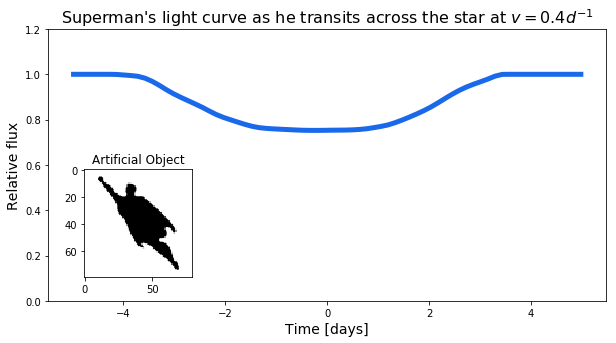

In [7]:
# the 1.png image is a standard planet
times = np.linspace(-35.,35.,500)
planet_lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/Downloads/supermanGOOD.png",
                                    lowres=80,
                                    lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                    lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                    v=0.4,
                                    t_ref=0.,
                                    t_arr=times)
#lowres_SItitle.plot_grid()
#print np.shape(lowres_SItitle.opacitymat)
    
planet_lowres_SItitle_LC, overlapTimes = planet_lowres_SItitle.gen_LC(t_arr=times) 
    
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax = plt.axes()
ax.plot(overlapTimes,planet_lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
ax.set_ylim(0.0,1.2)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"Superman's light curve as he transits across the star at $v = 0.4 d^{-1}$",fontsize=16)
ax1 = plt.axes([.1, .19, 0.3, 0.3])
ax1.set_title("Artificial Object")
ax1.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
filename = "/Users/piperfrances/Downloads/piper_LC.png"
plt.savefig(filename, fmt="png")
plt.show()
plt.close()
    